### **I часть: Анализ временного ряда**

### О датасете
Этот набор данных включает в себя информацию о производстве возобновляемой энергии за каждый месяц с 1973 года по февраль 2023 года. Это идеальный датасет для анализа временных рядов.

Мне всегда была интересна сфера возобновляемых источников энергии, в частности, способы и динамика их развития. Поэтому я выбрал данный датасет для анализа. Он был собран с официального сайта Управления энергетической информации США (U.S. Energy Information Administration): https://www.eia.gov

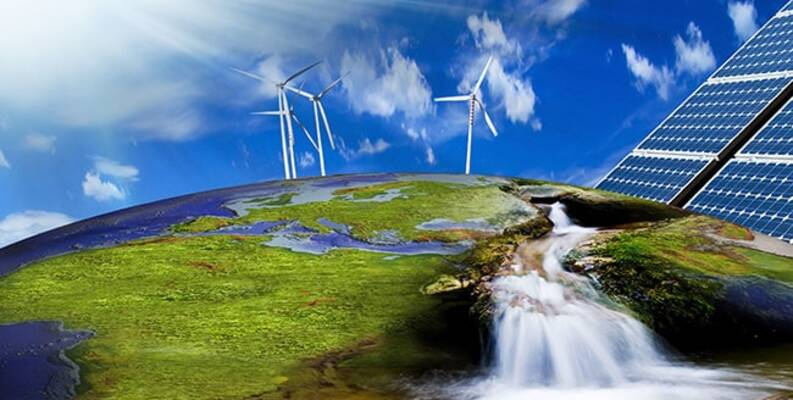

In [1]:
from IPython.display import Image
Image("dataset-cover.jpg", width=450, height=350)

In [2]:
import pandas as pd

In [3]:
# Загрузим данные из Excel файла
file_path = './Renewable_Energy_Production.xlsx'
data = pd.read_excel(file_path)

In [4]:
# Посмотрим на первые несколько строк данных
data.head()

,Date,Total Renewable Energy Production (Trillion Btu)
0,1973-01-01,403.981
1,1973-02-01,360.900
2,1973-03-01,400.161
3,1973-04-01,380.470
4,1973-05-01,392.141


In [5]:
# Посмотрим на последние несколько строк данных
data.tail()

,Date,Total Renewable Energy Production (Trillion Btu)
597,2022-10-01,1024.145
598,2022-11-01,1102.058
599,2022-12-01,1093.141
600,2023-01-01,1123.029
601,2023-02-01,1087.139


In [6]:
# Получим информацию о структура датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              602 non-null    datetime64[ns]
 1   Total Renewable Energy Production (Trillion Btu)  602 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.5 KB


Датасет состоит из 602 строк, пронумерованных от 0 до 601. В нем два столбца. Первый столбец называется `Date` и содержит даты, причём данные имеют тип `datetime64[ns]`. Это стандартный тип для хранения дат и времени в pandas. Второй столбец — `Total Renewable Energy Production (Trillion Btu)`, который содержит числовые значения (тип данных `float64`), представляющие общее производство возобновляемой энергии в триллионных долях британских тепловых единиц (British Thermal Unit).

Каждый из столбцов содержит 602 ненулевых значения. Значит, в данных нет пропущенных значений для обоих столбцов. Общий объём памяти, который занимает этот DataFrame, составляет приблизительно 9.5 килобайт.

Выдвинем гипотезу и выберем соответствующие методы для её проверки.

**Гипотеза:** Производство возобновляемой энергии показывает возрастающий тренд на протяжении рассматриваемого периода и обладает явной сезонной зависимостью.

**Методы для проверки гипотезы:**
1. Визуализация временного ряда для наглядного представления тренда и сезонности.
2. Декомпозиция временного ряда на компоненты: тренд, сезонность и остаток.
3. Статистический тест Дики-Фуллера для проверки стационарности временного ряда.


Предлагаю построить график временного ряда, чтобы визуально оценить тренды и возможную сезонность. Затем можно провести декомпозицию временного ряда.

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Установим дату в качестве индекса для удобства визуализации
data.set_index('Date', inplace=True)

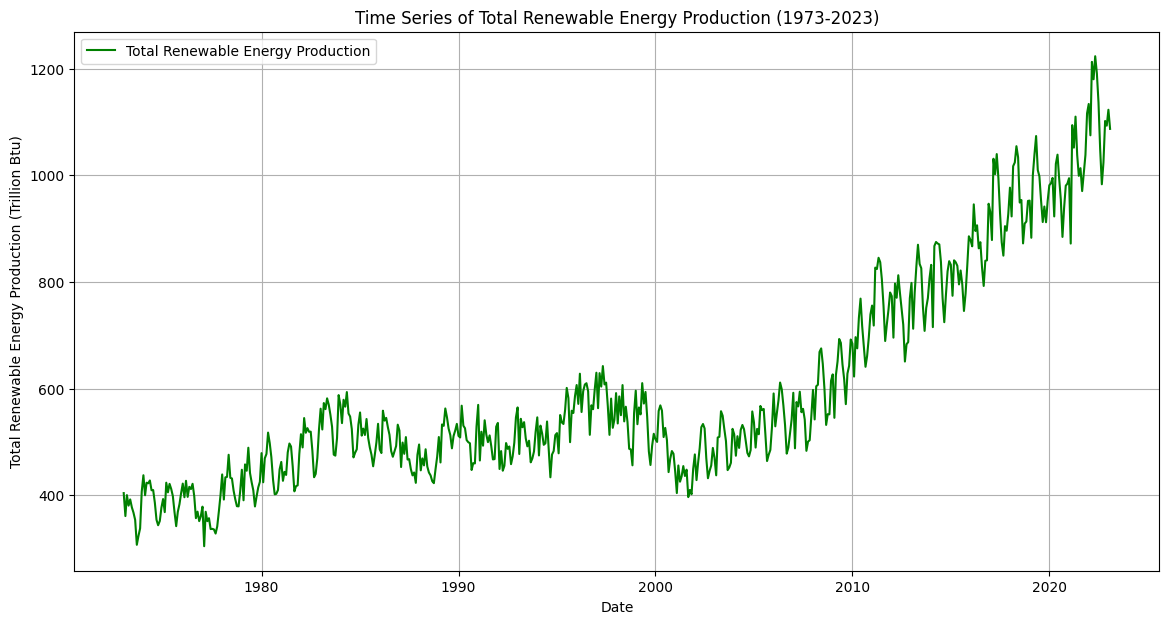

In [9]:
# Построим график временного ряда
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Total Renewable Energy Production (Trillion Btu)'], label='Total Renewable Energy Production', color='green')
plt.title('Time Series of Total Renewable Energy Production (1973-2023)')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.legend()
plt.grid(True)
plt.show()

На графике виден общий тренд на увеличение производства возобновляемой энергии с течением времени, а также **возможные сезонные колебания** в данных. Увеличение производства особенно заметно с начала нулевых.

Выполним декомпозицию временного ряда на тренд, сезонность и остаток, чтобы подробнее исследовать эти компоненты. Это поможет подтвердить наличие и характер тренда и сезонных колебаний, а также проверить, остаются ли данные стационарными после удаления этих компонентов. Применим к данным сезонную декомпозицию с помощью функции `seasonal_decompose` из библиотеки `statsmodels`.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Произведем сезонную декомпозицию временного ряда
decomposition = seasonal_decompose(data['Total Renewable Energy Production (Trillion Btu)'], model='additive', period=12)

In [12]:
# Получим отдельно тренд, сезонность и остаток
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

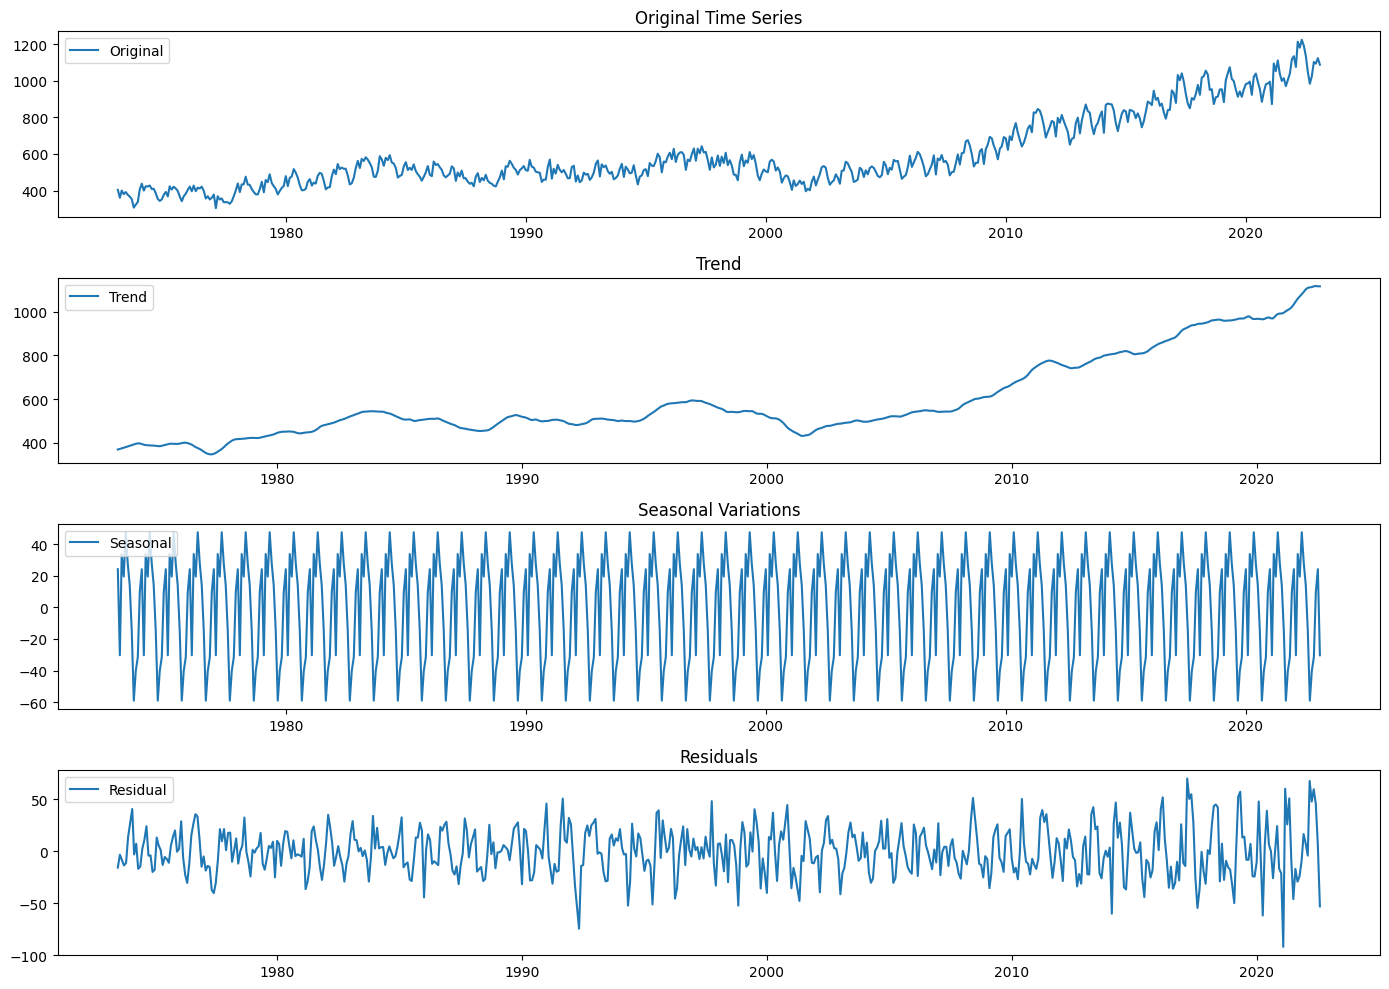

In [13]:
# Визуализируем компоненты декомпозиции
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data['Total Renewable Energy Production (Trillion Btu)'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Variations')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()

Декомпозиция временного ряда показывает следующее:

* **Оригинальный временной ряд** демонстрирует увеличение производства возобновляемой энергии на протяжении всего периода.
* **Тренд** подтверждает наличие долгосрочного возрастающего тренда в производстве возобновляемой энергии.
* **Сезонность** выявляет сезонные колебания в производстве, которые повторяются каждый год.
* **Остаток** представляет собой разницу между оригинальными данными и суммой тренда с сезонностью, позволяя увидеть необъяснимую часть временного ряда.

Теперь оценим стационарность остатков. Мы можем применить статистический тест, такой как расширенный тест Дики-Фуллера. Так можно проверить, есть ли в остатках ещё какие-либо тренды или сезонные эффекты, и подтвердить, что временной ряд после удаления тренда и сезонности становится стационарным (?).

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
# Удалим NaN значения, которые могли появиться после декомпозиции
residual_clean = residual.dropna()

In [16]:
# Произведем тест Дики-Фуллера на остатки
adf_test = adfuller(residual_clean)

In [17]:
# Выведем результаты теста Дики-Фуллера
adf_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

In [18]:
adf_result

{'Test Statistic': -9.09921250012466,
 'p-value': 3.644110182141315e-15,
 'Lags Used': 19,
 'Number of Observations Used': 570,
 'Critical Values': {'1%': -3.441874550188182,
  '5%': -2.8666239496633246,
  '10%': -2.569477593105571}}

Провели тест Дики-Фуллера для остатков.

Результаты теста Дики-Фуллера для остатков после декомпозиции показывают следующее:

- **Статистика теста** -9.099, что значительно меньше всех критических значений (для 1%, 5%, и 10% уровней значимости).
- **p-значение** 3.64e-15, что намного меньше стандартного порога 0.05.

Делаем вывод, что остатки стационарны, то есть после удаления тренда и сезонности оставшаяся часть временного ряда не содержит дополнительной информации о структуре или паттернах, которые не были бы учтены.

**Выводы из I части:**
1. Производство возобновляемой энергии демонстрирует чёткий возрастающий тренд за рассматриваемый период.
2. Временной ряд показывает явную сезонность, которая повторяется ежегодно.
3. После удаления тренда и сезонности остатки временного ряда стационарны, что подтверждает, что в данных не осталось неучтённых зависимостей.

### **II часть: Модель ИИ для прогозирования производства возобновляемой энергии**

Прогнозы производства возобновляемой энергии важны в стратегическом планировании мощностей. Правительства стран и компании смогут эффективнее планировать инвестиции в инфраструктуру и развитие этого сектора.

In [40]:
import warnings
warnings.filterwarnings('ignore')

### Технические особенности модели
- Использование ARIMA было оправдано наличием четко выраженных временных зависимостей в данных.
- Обратим внимание на то, что прогнозы не учитывают внешние экономические факторы или технологические изменения, которые могут оказать значительное влияние на производство возобновляемой энергии.



In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
# Установим параметры ARIMA на основе общепринятого начального выбора
model = ARIMA(data['Total Renewable Energy Production (Trillion Btu)'], order=(1, 1, 1))

In [43]:
# Обучим модель
fitted_model = model.fit()

In [34]:
# Сделаем прогноз на следующие 22 месяца
forecast = fitted_model.get_forecast(steps=22)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [35]:
# Выведем прогнозные значения
forecast_values, forecast_conf_int

(2023-03-01    1095.906855
 2023-04-01    1092.866975
 2023-05-01    1093.920924
 2023-06-01    1093.555512
 2023-07-01    1093.682203
 2023-08-01    1093.638278
 2023-09-01    1093.653507
 2023-10-01    1093.648227
 2023-11-01    1093.650058
 2023-12-01    1093.649423
 2024-01-01    1093.649643
 2024-02-01    1093.649567
 2024-03-01    1093.649593
 2024-04-01    1093.649584
 2024-05-01    1093.649587
 2024-06-01    1093.649586
 2024-07-01    1093.649587
 2024-08-01    1093.649587
 2024-09-01    1093.649587
 2024-10-01    1093.649587
 2024-11-01    1093.649587
 2024-12-01    1093.649587
 Freq: MS, Name: predicted_mean, dtype: float64,
             lower Total Renewable Energy Production (Trillion Btu)  \
 2023-03-01                                        1015.509236        
 2023-04-01                                         990.866504        
 2023-05-01                                         970.839850        
 2023-06-01                                         953.532625        
 2

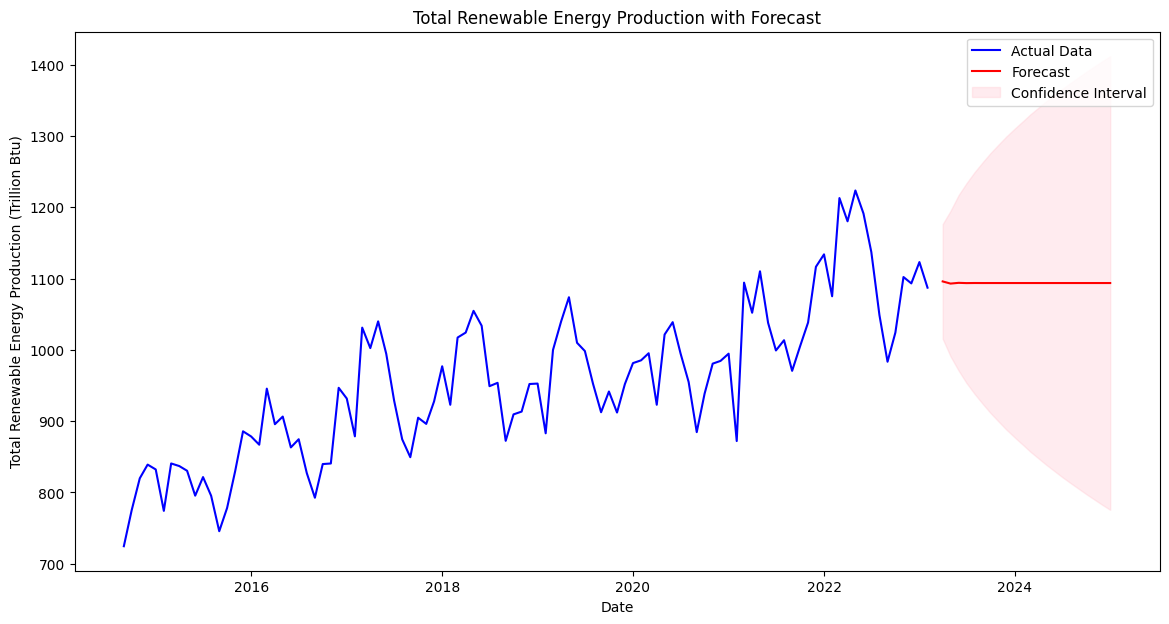

In [56]:
# Создадим даты для прогнозных значений
forecast_dates = pd.date_range(start='2023-03-01', periods=22, freq='M')

# Построим график
plt.figure(figsize=(14, 7))
plt.plot(data.index[500:], data['Total Renewable Energy Production (Trillion Btu)'][500:], label='Actual Data', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Добавляем доверительные интервалы
plt.fill_between(forecast_dates, forecast_conf_int['lower Total Renewable Energy Production (Trillion Btu)'], forecast_conf_int['upper Total Renewable Energy Production (Trillion Btu)'], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Total Renewable Energy Production with Forecast')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.legend()
plt.show()

# Показываем график
plt.show()

In [36]:
forecast_sum_2023 = forecast_values[:12].sum()    # Суммируем прогнозы за 2023 год
forecast_sum_2024 = forecast_values[12:24].sum()  # Суммируем прогнозы за 2024 год

In [37]:
print(f"Прогноз на 2023 год: {forecast_sum_2023}")
print(f"Прогноз на 2024 год: {forecast_sum_2024}")

Прогноз на 2023 год: 13125.47117286022
Прогноз на 2024 год: 10936.49587085706


**Выводы из II части:**
1. Прогнозируемые значения показывают относительную стабильность производства возобновляемой энергии в период с марта 2023 по декабрь 2024 года. Модель ARIMA предсказывает небольшие колебания вокруг среднего значения около 1093.65 триллионных долей Btu на месяц.

2. Доверительные интервалы начинаются с относительно маленького размаха в 2023 году и увеличиваются по мере продвижения к 2024. Это свидетельствует об уменьшении точности прогноза с увеличением неопределенности.

3. Суммарный прогноз на 2023 год выше, чем на 2024 год. Предполагается рост в ближайшем будущем, за которым последует стабилизация.

#### Дополнительно
Найдем месяц, когда исторически в среднем производится больше всего возобновляемой энергии.


In [28]:
# Группируем данные по месяцам и вычисляем среднее значение производства возобновляемой энергии для каждого месяца
monthly_means = data['Total Renewable Energy Production (Trillion Btu)'].groupby(data.index.month).mean()

In [29]:
# Определим месяц с максимальным средним значением
max_month = monthly_means.idxmax()

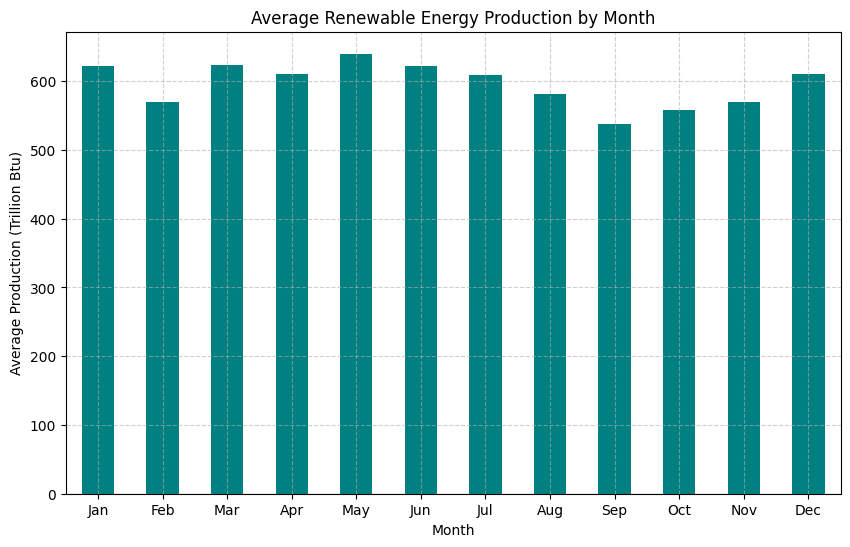

In [30]:
# Визуализация среднего производства возобновляемой энергии по месяцам
plt.figure(figsize=(10, 6))
monthly_means.plot(kind='bar', color='teal')
plt.title('Average Renewable Energy Production by Month')
plt.xlabel('Month')
plt.ylabel('Average Production (Trillion Btu)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.axhline(0, color='gray', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [31]:
print(max_month)

5


Ответ: Май